In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random as rnd
import warnings

from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [113]:
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_column",20)

df = pd.read_csv("spam.csv",encoding="ISO-8859-1")


def about_df(df):
    print("---------- HEAD ----------")
    print(df.head())
    print("---------- TAIL ----------")
    print(df.tail())
    print("---------- INFO ----------")
    df.info()
    print("---------- DESCRIBE ----------")
    print(df.describe())
    print("---------- SHAPE ----------")
    print(df.shape)
    print("---------- DIMENSION ----------")
    print(df.ndim)
    print("---------- MOST USED SENTENCE OR CHAR ----------")
    col = df.columns
    
    for c in col:
        print("**********\nCOLUMNS NAME: ",c.upper(),"\n**********\n")
        count = dict(df[c].value_counts())
        sorted(count.keys(),key = lambda k: count[k],reverse = True)
        
        for i in count:
            print(i,": ",count[i],"\n\n")
            break
    
about_df(df)

---------- HEAD ----------
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
---------- TAIL ----------
        v1                                                 v2 Unnamed: 2  \
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I act

In [3]:
to_drop = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
df = df.drop(to_drop,axis = 1)

# EDA

In [4]:
spam_df = df[df["v1"] == "spam"]

for i in spam_df["v2"]:
    print(i,"\n")

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv 

WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. 

Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 

SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info 

URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 

XXXMobileMovieClub: To use your credit, click the WAP link in the next txt 

As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a å£1500 Bonus Prize, call 09066364589 

Do you want a New Nokia 3510i colour phone DeliveredTomorrow? With 300 free minutes to any mobile + 100 free texts + Free Camcorder reply or call 08000930705 

LIFE has never been this much fun and great until you came in. You made it truly special for me. I won't forget you! enjoy @ one gbp/sms 

Do you want a new Video phone? 600 anytime any network mins 400 Inclusive Video calls AND downloads 5 per week Free delTOMORROW call 08002888812 or reply NOW 

As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a å£1500 Bonus Prize, call 09066368470 

Welcome! Please reply with your AGE and GENDER to begin. e.g 24M 

Freemsg: 1-month unlimited free calls! Activate SmartCall Txt: CALL to No: 68866. Subscriptn3gbp/wk unlimited calls Help: 08448714184 Stop?txt stop landlineonly 


C:\Users\fmemi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


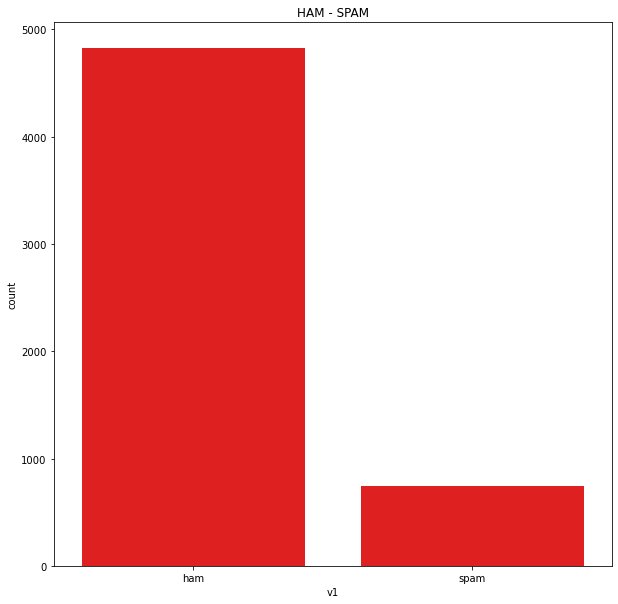

In [5]:
plt.figure(figsize = (10,10))
sns.countplot(df["v1"],color = "red")
plt.title("HAM - SPAM")
plt.show()

In [6]:
df["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [7]:
def find_number_of_words(df):
    df["number_of_words"] = 0
    
    for i in range(len(df)):
        col = df.iloc[i]
        tex = str(col["v2"]).split(" ")
        df["number_of_words"].iloc[i] = len(tex)
        
    return df

df = find_number_of_words(df)

C:\Users\fmemi\AppData\Local\Temp\ipykernel_13372\2810404422.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["number_of_words"].iloc[i] = len(tex)


In [8]:
df.head()

,v1,v2,number_of_words
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [9]:
ham = df[df["v1"] == "ham"]
spam = df[df["v1"] == "spam"]

In [10]:
s = dict(spam["number_of_words"].value_counts())
key = [i for i in s]
value = []
for i in key:
    value.append(s[i])
    
h = dict(ham["number_of_words"].value_counts())
keyh = [i for i in h]
valueh = []
for i in keyh:
    valueh.append(h[i])

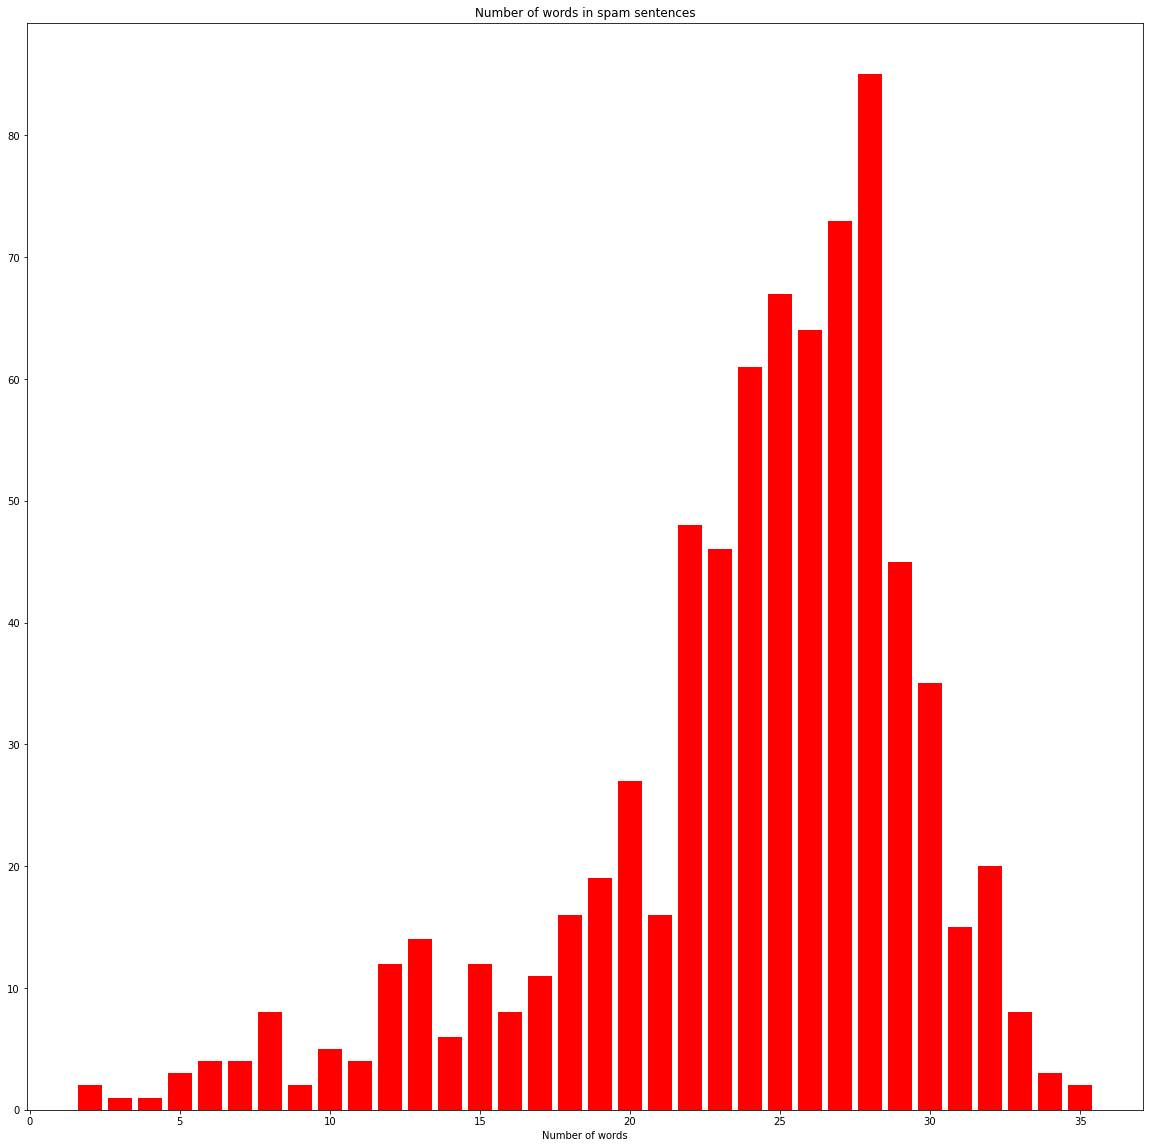

In [11]:
plt.figure(figsize = (20,20))
plt.title("Number of words in spam sentences")
plt.bar(key,value,color = "red")
plt.xlabel("Number of words")
plt.show()

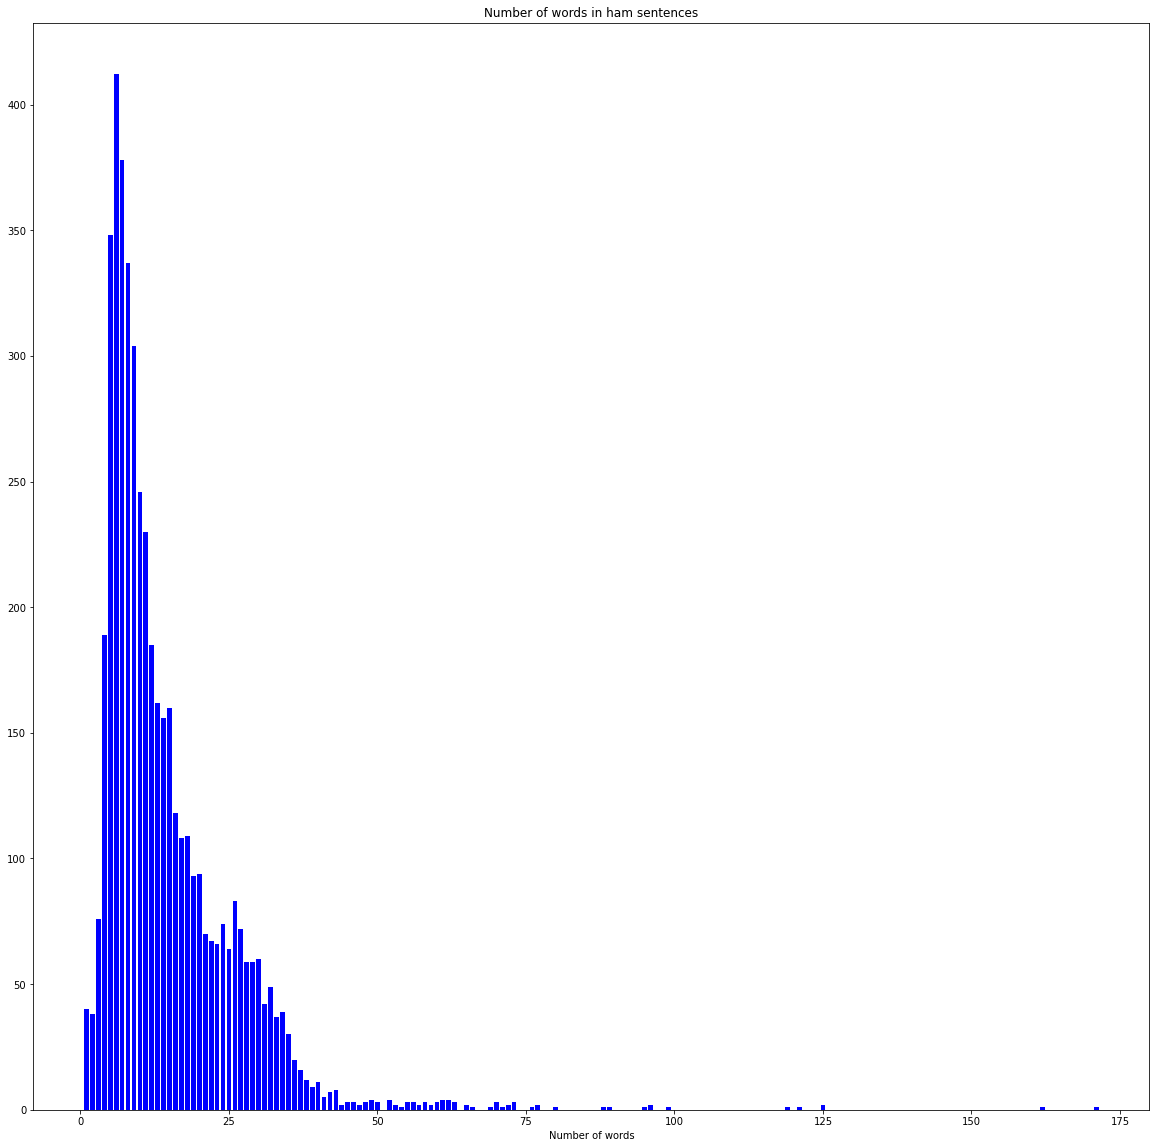

In [12]:
plt.figure(figsize = (20,20))
plt.bar(keyh,valueh,color = "blue")
plt.title("Number of words in ham sentences")
plt.xlabel("Number of words")
plt.show()

In [13]:
df["number_of_char"] = 0

for i in range(len(df)):
    col = df.iloc[i]
    sn = str(col["v2"])
    #col["number_of_char"] = len(sn)
    df["number_of_char"].iloc[i] = len(sn)

C:\Users\fmemi\AppData\Local\Temp\ipykernel_13372\2422722437.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["number_of_char"].iloc[i] = len(sn)


In [14]:
df

,v1,v2,number_of_words,number_of_char
0,ham,"Go until jurong point, crazy.. Available only ...",20,111
1,ham,Ok lar... Joking wif u oni...,6,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,ham,U dun say so early hor... U c already then say...,11,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30,161
5568,ham,Will Ì_ b going to esplanade fr home?,8,37
5569,ham,"Pity, * was in mood for that. So...any other s...",10,57
5570,ham,The guy did some bitching but I acted like i'd...,26,125


In [15]:
df["number_of_upper_words"] = 0
for i in range(len(df)):
    col = df["v2"].iloc[i]
    col = col.split(" ")
    count = 0
    
    for w in col:
        if w.isupper() and len(w) > 1:
            count+=1
    df["number_of_upper_words"].iloc[i] = count

C:\Users\fmemi\AppData\Local\Temp\ipykernel_13372\125774943.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["number_of_upper_words"].iloc[i] = count


In [16]:
df[df["number_of_upper_words"]!= 0]

,v1,v2,number_of_words,number_of_char,number_of_upper_words
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,2
8,spam,WINNER!! As a valued network customer you have...,26,158,2
9,spam,Had your mobile 11 months or more? U R entitle...,29,154,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",26,136,4
12,spam,URGENT! You have won a 1 week FREE membership ...,26,156,7
...,...,...,...,...,...
5548,ham,"No, I was trying it all weekend ;V",8,34,1
5561,ham,Get me out of this dump heap. My mom decided t...,15,70,1
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,28,147,3
5567,spam,This is the 2nd time we have tried 2 contact u...,30,161,1


In [17]:
df[df["v1"] == "spam"][["number_of_words","number_of_char"]]

,number_of_words,number_of_char
2,28,155
5,32,148
8,26,158
9,29,154
11,26,136
...,...,...
5537,16,90
5540,33,160
5547,28,160
5566,28,147


In [18]:
df[df["v1"] == "ham"][["number_of_words","number_of_char"]]

,number_of_words,number_of_char
0,20,111
1,6,29
3,11,49
4,13,61
6,16,77
...,...,...
5565,3,12
5568,8,37
5569,10,57
5570,26,125


In [19]:
df["number_of_not_alphabetic_character"] = 0

for i in range(len(df)):
    col = df["v2"].iloc[i]
    count = 0
    for c in col:
        if c == " ":
            continue
        if c.isalpha():
            continue
        else:
            count+=1
    df["number_of_not_alphabetic_character"].iloc[i] = count
    

C:\Users\fmemi\AppData\Local\Temp\ipykernel_13372\1703709672.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["number_of_not_alphabetic_character"].iloc[i] = count


In [20]:
df

,v1,v2,number_of_words,number_of_char,number_of_upper_words,number_of_not_alphabetic_character
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,0,9
1,ham,Ok lar... Joking wif u oni...,6,29,0,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,2,31
3,ham,U dun say so early hor... U c already then say...,11,49,0,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,0,2
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30,161,1,30
5568,ham,Will Ì_ b going to esplanade fr home?,8,37,1,2
5569,ham,"Pity, * was in mood for that. So...any other s...",10,57,0,7
5570,ham,The guy did some bitching but I acted like i'd...,26,125,0,1


In [21]:
df["Target"] = 0

for i in range(len(df)):
    col = df["v1"].iloc[i]
    
    if col == "spam":
        df["Target"].iloc[i] = 1

C:\Users\fmemi\AppData\Local\Temp\ipykernel_13372\4130314757.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Target"].iloc[i] = 1


In [22]:
df.head()

,v1,v2,number_of_words,number_of_char,number_of_upper_words,number_of_not_alphabetic_character,Target
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,0,9,0
1,ham,Ok lar... Joking wif u oni...,6,29,0,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,2,31,1
3,ham,U dun say so early hor... U c already then say...,11,49,0,6,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,0,2,0


# MODEL

In [23]:
model_df = df.drop(["v1","v2"],axis=1)
model_df.head()

,number_of_words,number_of_char,number_of_upper_words,number_of_not_alphabetic_character,Target
0,20,111,0,9,0
1,6,29,0,6,0
2,28,155,2,31,1
3,11,49,0,6,0
4,13,61,0,2,0


### Scaling

In [24]:
scaler = MinMaxScaler()
col = [c for c in model_df.columns if c != "Target"]

model_df[col] = scaler.fit_transform(model_df[col])

In [25]:
model_df.head()

,number_of_words,number_of_char,number_of_upper_words,number_of_not_alphabetic_character,Target
0,0.111765,0.120044,0.000000,0.065693,0
1,0.029412,0.029736,0.000000,0.043796,0
2,0.158824,0.168502,0.060606,0.226277,1
3,0.058824,0.051762,0.000000,0.043796,0
4,0.070588,0.064978,0.000000,0.014599,0


In [26]:
y = model_df["Target"]
x = model_df.drop("Target",axis = 1)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.3,
                                                random_state = 17)

In [28]:
print("x_train shape: {}\nx_test shape: {}\ny_train shape: {}\ny_test shape: {}".format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

x_train shape: (3900, 4)
x_test shape: (1672, 4)
y_train shape: (3900,)
y_test shape: (1672,)


In [147]:
roc_curve = {}
feature_impo = {}

## Logistic Regression

In [148]:
logistic_regression = LogisticRegression().fit(x_train,y_train)

In [149]:
y_head_logistic_regression = logistic_regression.predict(x_test)

In [150]:
print(classification_report(y_test,y_head_logistic_regression))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1442
           1       0.82      0.45      0.58       230

    accuracy                           0.91      1672
   macro avg       0.87      0.72      0.76      1672
weighted avg       0.90      0.91      0.90      1672



In [151]:
lrcm = confusion_matrix(y_test,y_head_logistic_regression)
confusion_matrix_result["Logistic Regression"] = lrcm
lrcm

array([[1419,   23],
       [ 127,  103]], dtype=int64)

In [152]:
roc_curve["Logistic Regression"] = logistic_regression

## KNeighbors Classifier

In [153]:
kn_classifier = KNeighborsClassifier().fit(x_train,y_train)

In [154]:
y_head_KNeighborsClassifier = kn_classifier.predict(x_test)

In [155]:
print(classification_report(y_test,y_head_KNeighborsClassifier))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1442
           1       0.83      0.83      0.83       230

    accuracy                           0.95      1672
   macro avg       0.90      0.90      0.90      1672
weighted avg       0.95      0.95      0.95      1672



In [156]:
kncm = confusion_matrix(y_test,y_head_KNeighborsClassifier)
confusion_matrix_result["Kneighbors Classifier"] = kncm
kncm

array([[1404,   38],
       [  40,  190]], dtype=int64)

In [157]:
roc_curve["Kneighbors Classifier"] = kn_classifier

## Decision Tree Classifier

In [158]:
decision_tree = DecisionTreeClassifier().fit(x_train,y_train)

In [159]:
y_head_decision_tree = decision_tree.predict(x_test)

In [160]:
print(classification_report(y_test,y_head_decision_tree))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1442
           1       0.81      0.77      0.79       230

    accuracy                           0.94      1672
   macro avg       0.89      0.87      0.88      1672
weighted avg       0.94      0.94      0.94      1672



In [161]:
dtcm = confusion_matrix(y_test,y_head_decision_tree)
confusion_matrix_result["Decision Tree"] = dtcm
dtcm

array([[1400,   42],
       [  52,  178]], dtype=int64)

In [162]:
roc_curve["decision tree classifier"] = decision_tree
feature_impo["decision tree classifier"] = decision_tree

## Random Forest

In [163]:
random_forest = RandomForestClassifier().fit(x_train,y_train)

In [164]:
y_head_random_forest = random_forest.predict(x_test)

In [165]:
print(classification_report(y_test,y_head_random_forest))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1442
           1       0.89      0.82      0.85       230

    accuracy                           0.96      1672
   macro avg       0.93      0.90      0.92      1672
weighted avg       0.96      0.96      0.96      1672



In [166]:
rfcm = confusion_matrix(y_test,y_head_random_forest)
confusion_matrix_result["Random Forest"] = rfcm
rfcm

array([[1419,   23],
       [  42,  188]], dtype=int64)

In [167]:
roc_curve["Random Forest"] = random_forest
feature_impo["Random Forest"] = random_forest

## GradientBoosting

In [168]:
grad_boosting = GradientBoostingClassifier().fit(x_train,y_train)

In [169]:
y_head_grad_boost = grad_boosting.predict(x_test)

In [170]:
print(classification_report(y_test,y_head_grad_boost))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1442
           1       0.87      0.82      0.84       230

    accuracy                           0.96      1672
   macro avg       0.92      0.90      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [171]:
gbcm = confusion_matrix(y_test,y_head_grad_boost)
confusion_matrix_result["Gradient Boosting"] = gbcm
gbcm

array([[1413,   29],
       [  41,  189]], dtype=int64)

In [172]:
roc_curve["GradientBoosting"] = grad_boosting
feature_impo["GradientBoosting"] = grad_boosting

# Model Improvement

### Logistic Regression

In [173]:
logi_reg_param = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}

In [174]:
logistic_reg_grid_search = GridSearchCV(logistic_regression,
                                       logi_reg_param,
                                        cv = 5,
                                        n_jobs = -1,
                                        verbose = True).fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [175]:
print(logistic_reg_grid_search.best_params_)

{'class_weight': 'balanced', 'max_iter': 20, 'solver': 'liblinear'}


In [176]:
logistic_regression_grid_search = logistic_regression.set_params(**logistic_reg_grid_search.best_params_).fit(x_train,y_train)

In [177]:
y_head_log_reg_GS = logistic_regression_grid_search.predict(x_test)

In [178]:
print(classification_report(y_test,y_head_log_reg_GS))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1442
           1       0.59      0.85      0.70       230

    accuracy                           0.90      1672
   macro avg       0.78      0.88      0.82      1672
weighted avg       0.92      0.90      0.91      1672



In [179]:
lrgscm = confusion_matrix(y_test,y_head_log_reg_GS)
confusion_matrix_result["Logistic Regression GridSearchCV"] = lrgscm
lrgscm

array([[1309,  133],
       [  35,  195]], dtype=int64)

In [180]:
roc_curve["Logistic Regression GridSearch"] = logistic_regression_grid_search

### KNeighbors

In [181]:
knn_parameters = {"n_neighbors":range(3,9),
                  "weights":["uniform", "distance"],
                  "algorithm":["auto","ball_tree","kd_tree","brute"],
                  "leaf_size" : range(25,36)}

In [182]:
kneighbors_gridS = GridSearchCV(kn_classifier,
                                knn_parameters,
                                cv = 5,
                                n_jobs = -1,
                                verbose = True).fit(x_train,y_train)

Fitting 5 folds for each of 528 candidates, totalling 2640 fits


In [183]:
print(kneighbors_gridS.best_params_)

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 7, 'weights': 'distance'}


In [184]:
kneighbors_grid_search = kn_classifier.set_params(**kneighbors_gridS.best_params_).fit(x_train,y_train)

In [185]:
y_head_kneigh_gs = kneighbors_grid_search.predict(x_test)

In [186]:
print(classification_report(y_test,y_head_kneigh_gs))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1442
           1       0.88      0.82      0.85       230

    accuracy                           0.96      1672
   macro avg       0.93      0.90      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [187]:
kngscm = confusion_matrix(y_test,y_head_kneigh_gs)
confusion_matrix_result["Kneighbors GridSearchCV"] = kngscm
kngscm

array([[1417,   25],
       [  41,  189]], dtype=int64)

In [188]:
roc_curve["Kneighbors GridSearch"] = kneighbors_grid_search

### Decision Tree Classifier

In [189]:
decision_tree_param = {"criterion":["gini", "entropy"],
                       "splitter":["best", "random"],
                       "min_samples_split":range(2,10),
                       "max_features":["auto","sqrt","log2"]}

In [190]:
decision_tree_grid_search = GridSearchCV(decision_tree,
                                        decision_tree_param,
                                        cv = 5,
                                        n_jobs = -1,
                                        verbose = True).fit(x_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [191]:
print(decision_tree_grid_search.best_params_)

{'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 8, 'splitter': 'random'}


In [192]:
decision_tree_gridS = decision_tree.set_params(**decision_tree_grid_search.best_params_).fit(x_train,y_train)

In [193]:
y_head_decision_tree_gs = decision_tree_gridS.predict(x_test)

In [194]:
print(classification_report(y_test,y_head_decision_tree_gs))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1442
           1       0.83      0.72      0.77       230

    accuracy                           0.94      1672
   macro avg       0.89      0.85      0.87      1672
weighted avg       0.94      0.94      0.94      1672



In [195]:
dtgscm = confusion_matrix(y_test,y_head_decision_tree_gs)
confusion_matrix_result["Decision Tree GridSearchCV"] = dtgscm
dtgscm

array([[1408,   34],
       [  64,  166]], dtype=int64)

In [196]:
roc_curve["Decision Tree GridSearch"] = decision_tree_gridS
feature_impo["Decision Tree GridSearch"] = decision_tree_gridS

### Random Forest

In [197]:
random_forest_params = {"n_estimators":range(75,126),
                        "criterion":["gini", "entropy"],
                        "max_features":["sqrt","log2"],
                        "class_weight":["balanced", "balanced_subsample"]}

In [198]:
random_forest_grid_search = GridSearchCV(random_forest,
                                        random_forest_params,
                                        cv = 5,
                                        n_jobs = -1,
                                        verbose = True).fit(x_train,y_train)

Fitting 5 folds for each of 408 candidates, totalling 2040 fits


In [199]:
print(random_forest_grid_search.best_params_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 102}


In [200]:
random_forest_gsCV = random_forest.set_params(**random_forest_grid_search.best_params_).fit(x_train,y_train)

In [201]:
y_head_ran_forest_gs = random_forest_gsCV.predict(x_test)

In [202]:
print(classification_report(y_test,y_head_ran_forest_gs))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1442
           1       0.90      0.80      0.85       230

    accuracy                           0.96      1672
   macro avg       0.93      0.89      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [203]:
rfgscm = confusion_matrix(y_test,y_head_ran_forest_gs)
confusion_matrix_result["Random Forest GridSearchCV"] = rfgscm
rfgscm

array([[1421,   21],
       [  46,  184]], dtype=int64)

In [204]:
roc_curve["Random Forest GridSearch"] = random_forest_gsCV
feature_impo["Random Forest GridSearch"] = random_forest_gsCV

### Gradient Boosting

In [205]:
gb_params = {"loss":["deviance","exponential"],
                  "learning_rate":[0.01,0.05,0.1,0.15],
                  "criterion":["friedman_mse","squared_error"],
                  "min_samples_split":range(2,10),
                  "random_state": [16]
                  }

In [206]:
gradient_boosting_grid_search = GridSearchCV(grad_boosting,
                                            gb_params,
                                            cv = 5,
                                            n_jobs = -1,
                                            verbose = True).fit(x_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


In [207]:
print(gradient_boosting_grid_search.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.15, 'loss': 'exponential', 'min_samples_split': 7, 'random_state': 16}


In [208]:
gradient_boostingGSCV = grad_boosting.set_params(**gradient_boosting_grid_search.best_params_)

In [209]:
y_head_grad_boos_gscv = gradient_boostingGSCV.predict(x_test)

In [210]:
print(classification_report(y_test,y_head_grad_boos_gscv))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1442
           1       0.80      0.86      0.83       230

    accuracy                           0.95      1672
   macro avg       0.89      0.91      0.90      1672
weighted avg       0.95      0.95      0.95      1672



In [211]:
gbgscm = confusion_matrix(y_test,y_head_grad_boos_gscv)
confusion_matrix_result["Gradient Boosting GridSearchCV"] = gbgscm
gbgscm

array([[1394,   48],
       [  33,  197]], dtype=int64)

In [212]:
roc_curve["Gradient Boosting GridSearch"] = gradient_boostingGSCV
feature_impo["Gradient Boosting GridSearch"] = gradient_boostingGSCV

## Confusion Matrix Results

Logistic Regression :


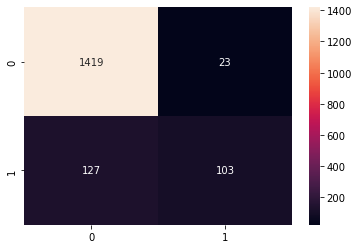



Kneighbors Classifier :


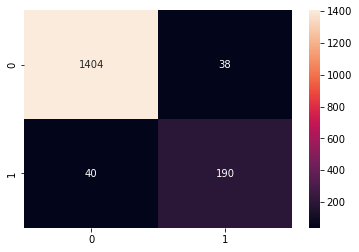



Decision Tree :


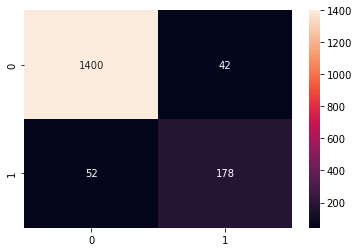



Random Forest :


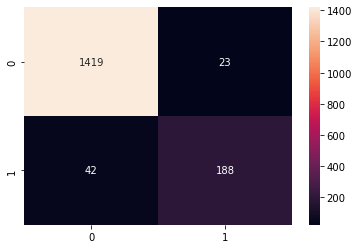



Gradient Boosting :


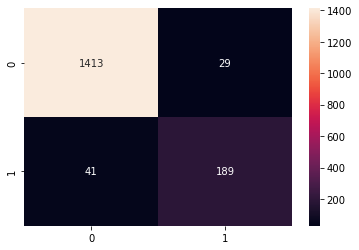



Logistic Regression GridSearchCV :


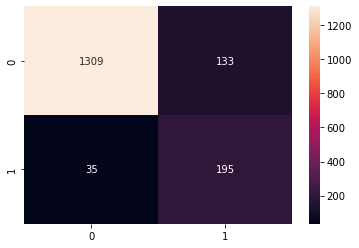



Kneighbors GridSearchCV :


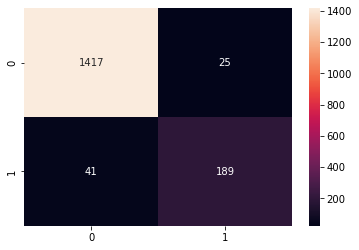



Decision Tree GridSearchCV :


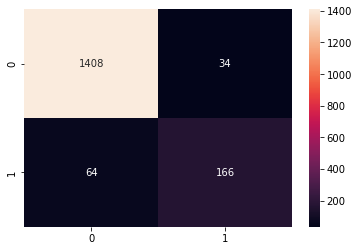



Random Forest GridSearchCV :


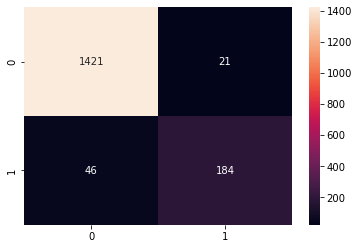



Gradient Boosting GridSearchCV :


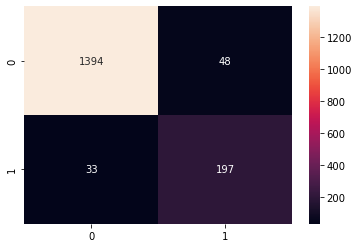

In [213]:
for model_name in confusion_matrix_result:
    print(model_name,":")
    sns.heatmap(confusion_matrix_result[model_name],annot = True,fmt = ".0f")
    plt.show(block = True)
    print("\n")

# ROC Curve

Model name:  Logistic Regression


<Figure size 1080x1080 with 0 Axes>

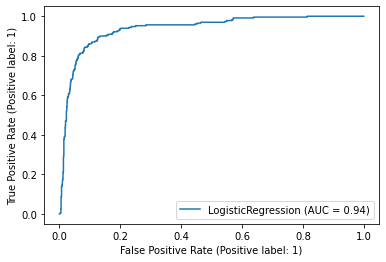

Model name:  Kneighbors Classifier


<Figure size 1080x1080 with 0 Axes>

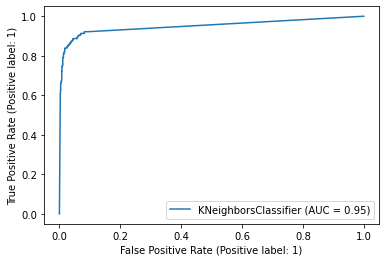

Model name:  decision tree classifier


<Figure size 1080x1080 with 0 Axes>

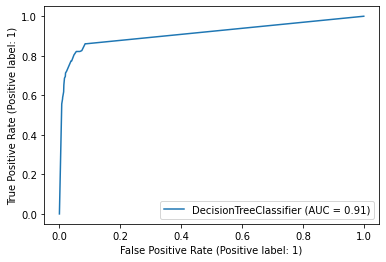

Model name:  Random Forest


<Figure size 1080x1080 with 0 Axes>

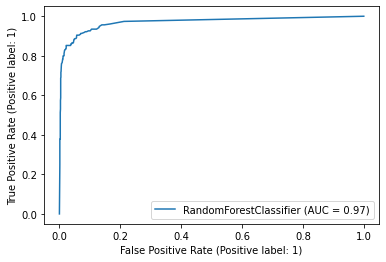

Model name:  GradientBoosting


<Figure size 1080x1080 with 0 Axes>

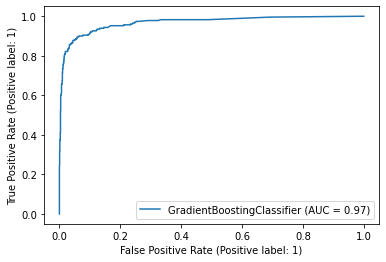

Model name:  Logistic Regression GridSearch


<Figure size 1080x1080 with 0 Axes>

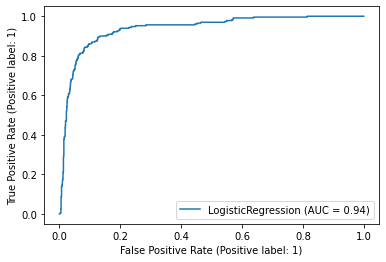

Model name:  Kneighbors GridSearch


<Figure size 1080x1080 with 0 Axes>

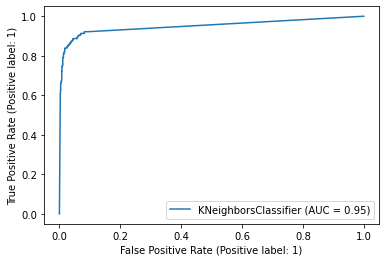

Model name:  Decision Tree GridSearch


<Figure size 1080x1080 with 0 Axes>

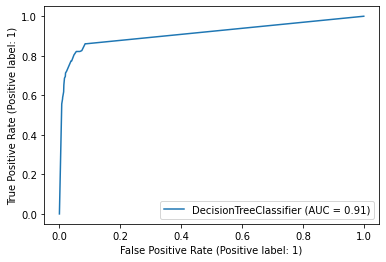

Model name:  Random Forest GridSearch


<Figure size 1080x1080 with 0 Axes>

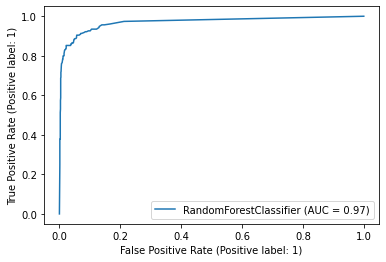

Model name:  Gradient Boosting GridSearch


<Figure size 1080x1080 with 0 Axes>

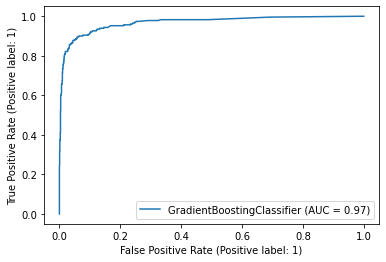

In [214]:
for model in roc_curve:
    print("Model name: ",model)
    plt.figure(figsize = (15,15))
    plot_roc_curve(roc_curve[model],x_test,y_test)
    plt.show()

# Feature Importances

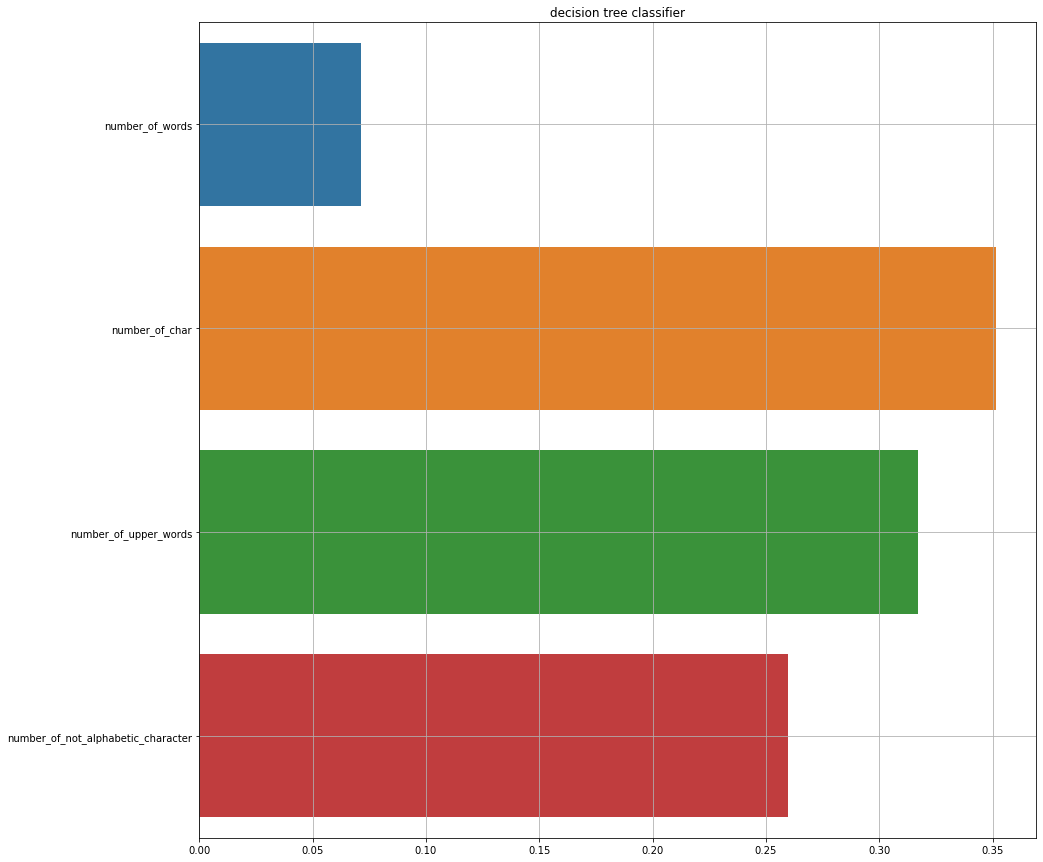

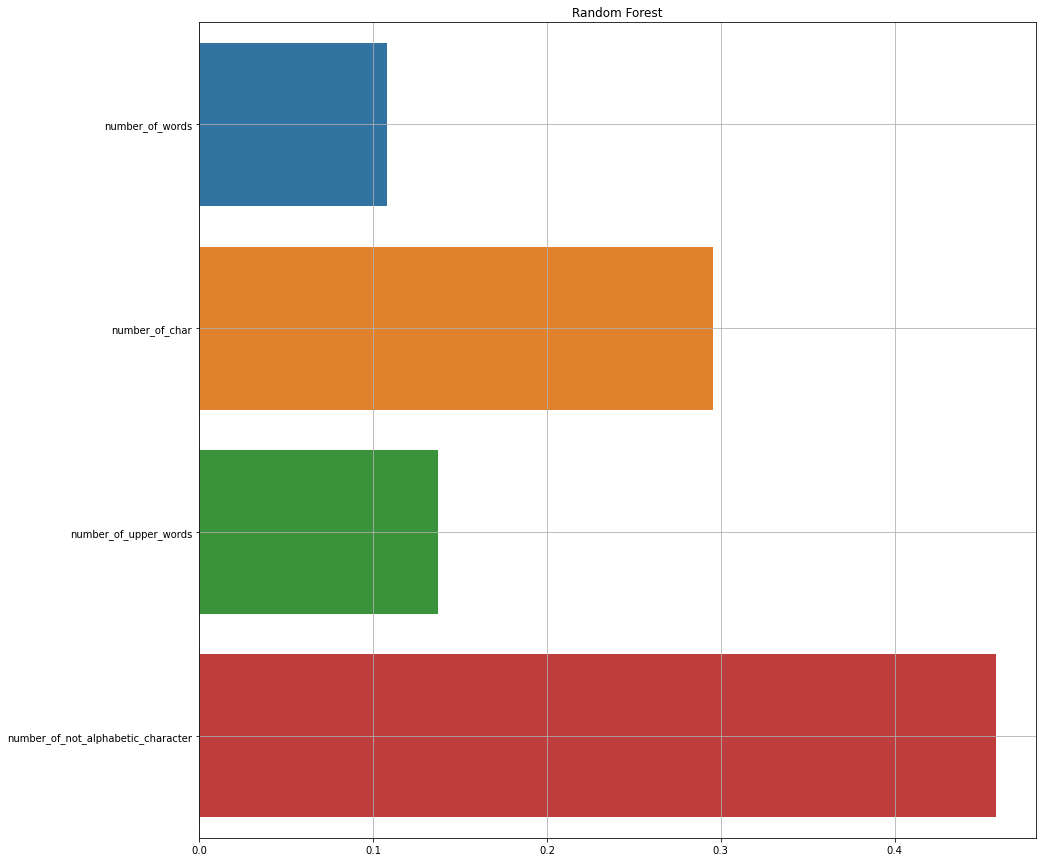

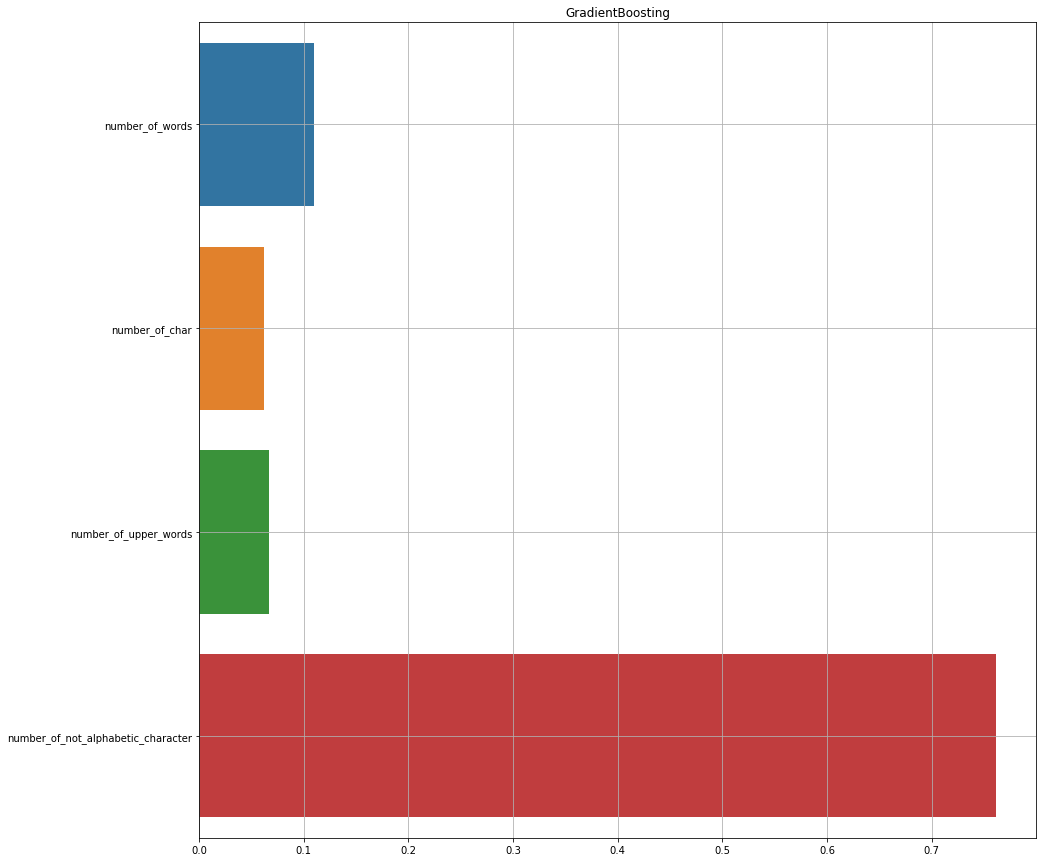

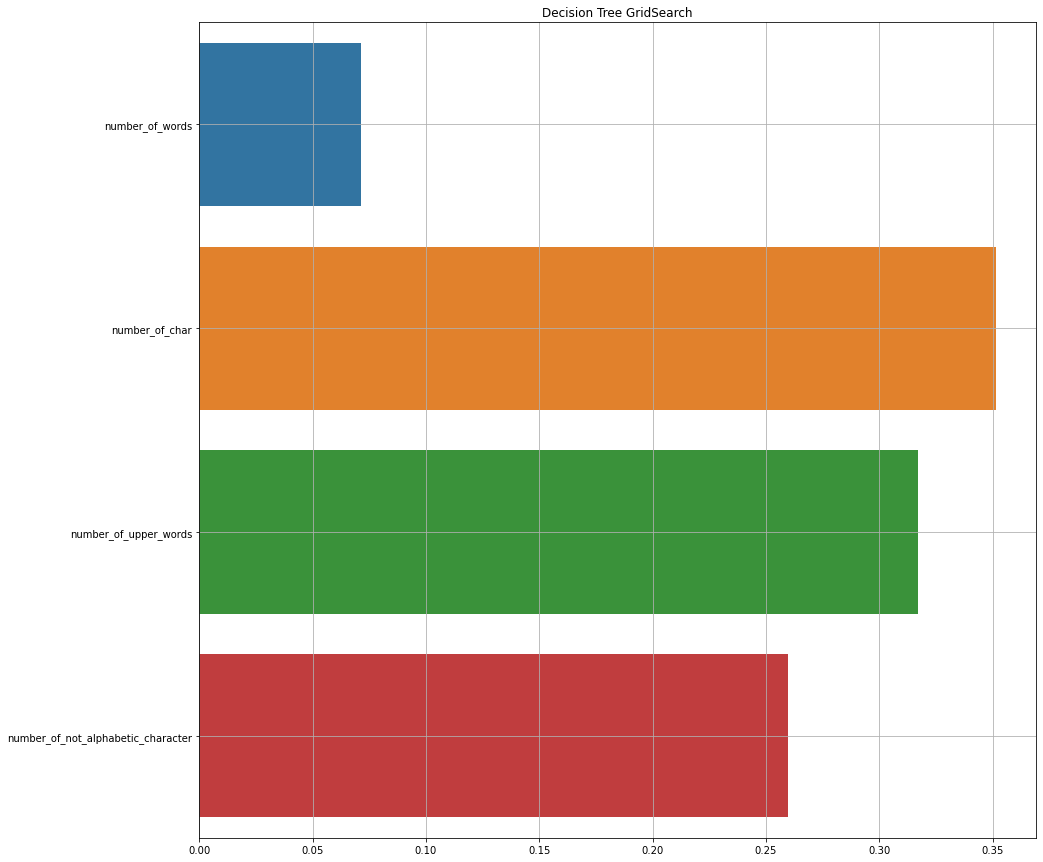

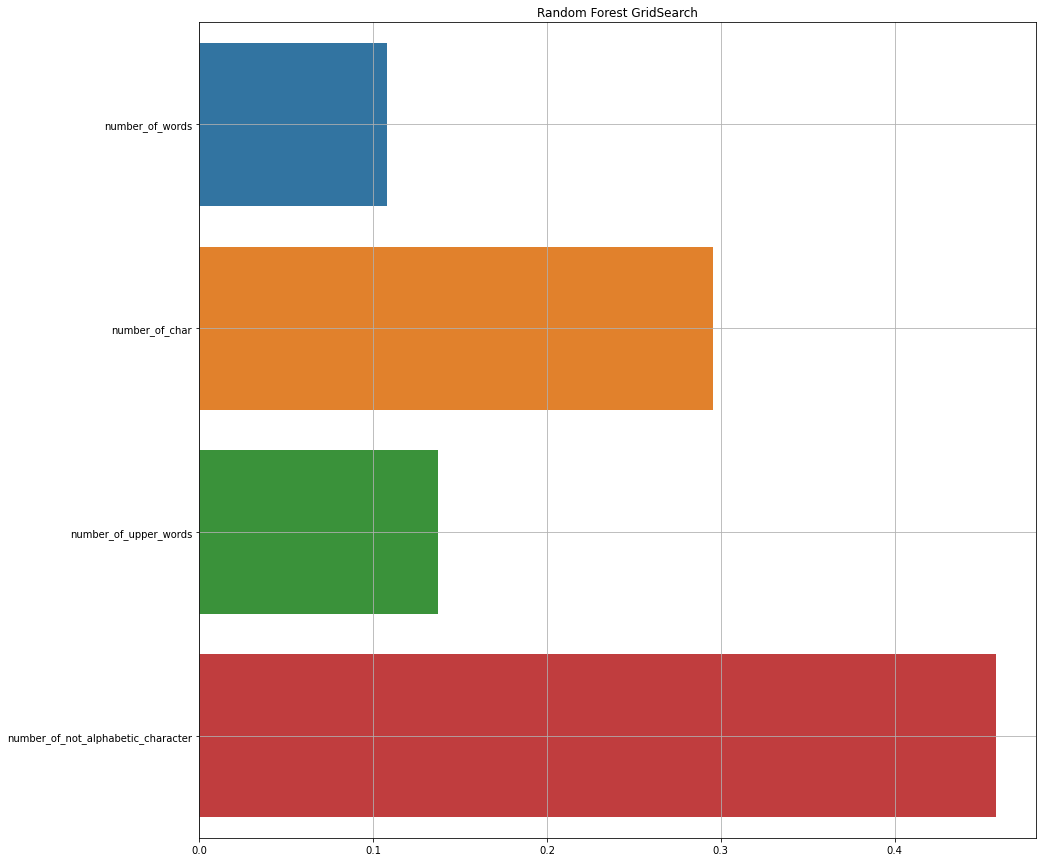

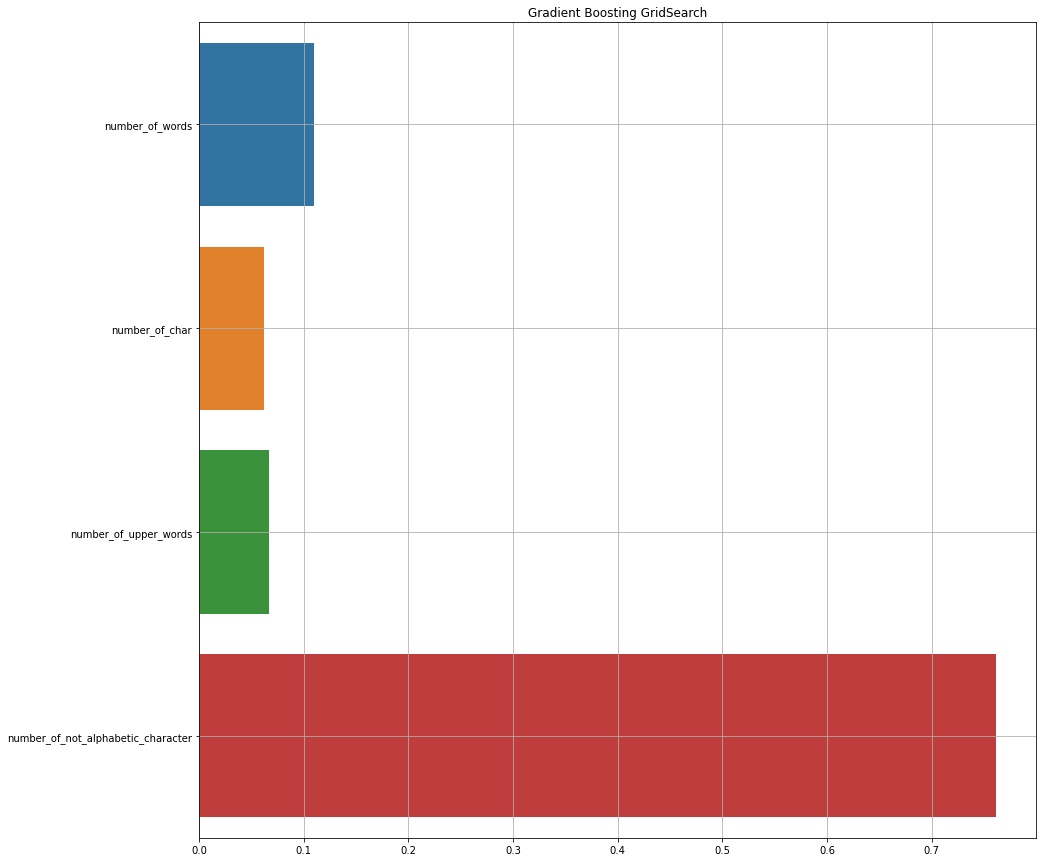

In [224]:
col_name = x_train.columns
for model in feature_impo:
        imp = roc_curve[model].feature_importances_
        plt.figure(figsize = (15,15))
        plt.title(model)
        sns.barplot(imp,col_name)
        plt.grid()
        plt.show()
        

# Predict

### Gradient Boosting

In [282]:
random_row = rnd.randint(0,len(x_train))

In [283]:
row = np.array([x_train.iloc[random_row]])

In [284]:
row

array([[0.1       , 0.09030837, 0.        , 0.04379562]])

In [285]:
print("Gradient Boosting\nReal: {}\nPredict: {}".format(y_train.iloc[random_row],grad_boosting.predict(row)))

Gradient Boosting
Real: 0
Predict: [0]


In [286]:
print("Gradient Boosting GridSearch\nReal: {}\nPredict: {}".format(y_train.iloc[random_row],gradient_boostingGSCV.predict(row)))

Gradient Boosting GridSearch
Real: 0
Predict: [0]


### Random Forest

In [287]:
print("Random Forest\nReal: {}\nPredict: {}".format(y_train.iloc[random_row],random_forest.predict(row)))

Random Forest
Real: 0
Predict: [0]


In [288]:
print("Random Forest GridSearch\nReal: {}\nPredict: {}".format(y_train.iloc[random_row],random_forest_gsCV.predict(row)))

Random Forest GridSearch
Real: 0
Predict: [0]


# FM